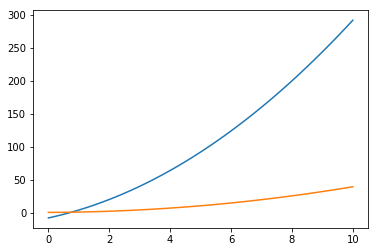

In [135]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,10,101)
y = 2*np.power(x, 2) + 10*x - 8
p = np.random.rand(3)
f = np.poly1d(p)

plt.plot(x,y)
plt.plot(x, f(x))

In [142]:

poly = PolynomialFeatures(2, include_bias=False)
xp = poly.fit_transform(x.reshape((x.size,1)))
xpn = (xp - xp.mean(axis=0)) / xp.std(axis=0)

In [143]:
mu = xp.mean(axis=0)
sig = xp.std(axis=0)

mu, sig

(array([  5. ,  33.5]), array([  2.91547595,  30.12943743]))

[ 2.15716975  8.14885611 -3.57105644]


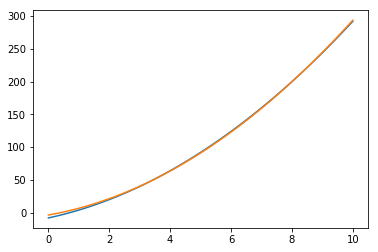

In [149]:
alpha = 0.0005

for i in range(10000):
    f = np.poly1d(p)
    diff = y - f(x)
    p[0] += alpha * np.mean(diff * np.power(x, 2))
    p[1] += alpha * np.mean(diff * x)
    p[2] += alpha * np.mean(diff)

f = np.poly1d(p)
plt.plot(x, y)
plt.plot(x, f(x))
print(p)

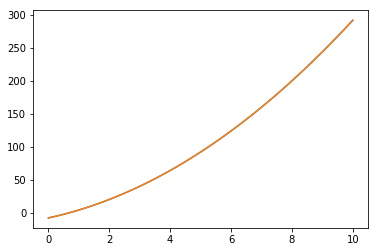

In [121]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(2, include_bias=False)
xp = poly.fit_transform(x.reshape((x.size,1)))

lin = LinearRegression()
lin.fit(xp, y)
plt.plot(x, y)
plt.plot(x, lin.predict(xp))

In [113]:
lin.coef_, lin.intercept_

(array([ 10.,   2.]), -7.9999999999999574)

In [114]:
poly = PolynomialFeatures(2, include_bias=True)
xp = poly.fit_transform(x.reshape((x.size,1)))

np.linalg.inv(xp.T.dot(xp))

array([[ 0.08567099, -0.0340965 ,  0.00282724],
       [-0.0340965 ,  0.0182996 , -0.00171348],
       [ 0.00282724, -0.00171348,  0.00017135]])

array([-8., 10.,  2.])

# Two Lines

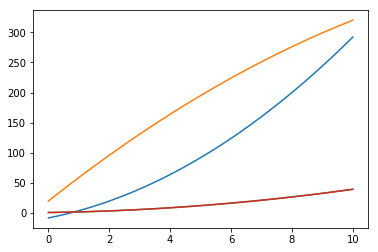

In [150]:
x1 = np.linspace(0,10,101)
y1 = 2*np.power(x, 2) + 10*x - 8
p1 = np.random.rand(3)
f1 = np.poly1d(p1)

x2 = np.linspace(0,10,101)
y2 = -1*np.power(x, 2) + 40*x + 20
p2 = np.random.rand(3)
f2 = np.poly1d(p2)

plt.plot(x1,y1)
plt.plot(x2,y2)

plt.plot(x1, f1(x1))

plt.plot(x2, f1(x2))

In [154]:
poly = PolynomialFeatures(2, include_bias=True)
x1p = poly.fit_transform(x1.reshape((x1.size,1)))
x2p = poly.fit_transform(x2.reshape((x2.size,1)))


In [168]:
X = np.vstack([
    np.hstack([x1p, np.zeros_like(x1p)]),
    np.hstack([np.zeros_like(x2p), x2p])
])
X.shape

(202, 6)

In [169]:
Y = np.concatenate([y1, y2])
Y.shape

(202,)

In [170]:
np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))

array([ -8.,  10.,   2.,  20.,  40.,  -1.])

In [171]:
X.T.dot(X)

array([[  1.01000000e+02,   5.05000000e+02,   3.38350000e+03,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.05000000e+02,   3.38350000e+03,   2.55025000e+04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.38350000e+03,   2.55025000e+04,   2.05033333e+05,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.01000000e+02,   5.05000000e+02,   3.38350000e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.05000000e+02,   3.38350000e+03,   2.55025000e+04],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.38350000e+03,   2.55025000e+04,   2.05033333e+05]])

# Constrained Lines

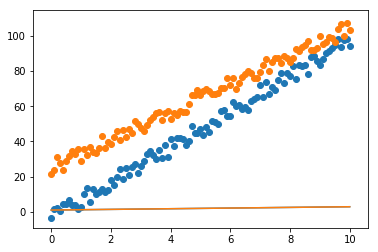

In [173]:
x1 = np.linspace(0,10,101)
y1 = 10*x - 8 + np.random.rand(101)*10
p1 = np.random.rand(2)
f1 = np.poly1d(p1)

x2 = np.linspace(0,10,101)
y2 = 8*x + 20 + np.random.rand(101)*10
p2 = np.random.rand(3)
f2 = np.poly1d(p2)

plt.scatter(x1,y1)
plt.scatter(x2,y2)

plt.plot(x1, f1(x1))

plt.plot(x2, f1(x2))

In [175]:
poly = PolynomialFeatures(1, include_bias=True)
x1p = poly.fit_transform(x1.reshape((x1.size,1)))
x2p = poly.fit_transform(x2.reshape((x2.size,1)))

X = np.vstack([
    np.hstack([x1p, np.zeros_like(x1p)]),
    np.hstack([np.zeros_like(x2p), x2p])
])
Y = np.concatenate([y1, y2])
np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))

array([ -3.14705702,  10.0681534 ,  24.95496153,   7.97605874])

In [186]:
L = np.zeros((4,4))
L[1,1] = 1
L[1,3] = -1
L[3,1] = -1
L[3,3] = 1
L = L*100

In [187]:
np.linalg.inv(X.T.dot(X) + L*np.var(Y)).dot(X.T.dot(Y))

array([  2.05479308,   9.02778338,  19.75311144,   9.01642876])

# Constrained Polynomial

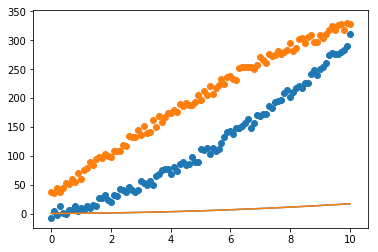

In [190]:
x1 = np.linspace(0,10,101)
y1 = 2*np.power(x1, 2) + 10*x - 8 + 20 * np.random.rand(101)
p1 = np.random.rand(3)
f1 = np.poly1d(p1)

x2 = np.linspace(0,10,101)
y2 = -1*np.power(x2, 2) + 40*x + 20 + 20 * np.random.rand(101)
p2 = np.random.rand(3)
f2 = np.poly1d(p2)

plt.scatter(x1,y1)
plt.scatter(x2,y2)

plt.plot(x1, f1(x1))

plt.plot(x2, f1(x2))

In [191]:
poly = PolynomialFeatures(2, include_bias=True)
x1p = poly.fit_transform(x1.reshape((x1.size,1)))
x2p = poly.fit_transform(x2.reshape((x2.size,1)))

X = np.vstack([
    np.hstack([x1p, np.zeros_like(x1p)]),
    np.hstack([np.zeros_like(x2p), x2p])
])
Y = np.concatenate([y1, y2])
np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))

array([ -2.72719821,  12.21704889,   1.78984223,  30.98311046,
        39.64274014,  -0.96284331])

In [223]:
Y.shape

(202,)

In [221]:
L = np.zeros((6,6))
L[1,1] = 1
L[1,4] = -1
L[2,2] = 1
L[2,5] = -1
L[4,1] = -1
L[4,4] = 1
L[5,2] = -1
L[5,5] = 1
L = L*1000

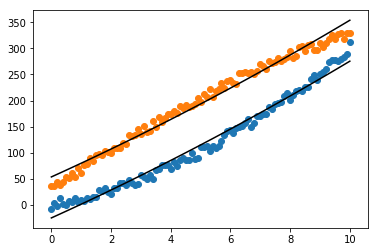

In [222]:
b_fit = np.linalg.inv(X.T.dot(X) + L*np.var(Y)).dot(X.T.dot(Y))
f1 = np.poly1d(b_fit[:3][::-1])
f2 = np.poly1d(b_fit[3:][::-1])

plt.scatter(x1,y1)
plt.scatter(x2,y2)

plt.plot(x1, f1(x1), color='black')
plt.plot(x2, f2(x2), color='black')

In [206]:
b_fit[:3][::-1], b_fit[3:][::-1]

(array([  0.41780232,  25.92989797, -25.32810669]),
 array([  0.40919659,  25.92989106,  53.58401894]))

In [209]:
x2

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9,  10. ])

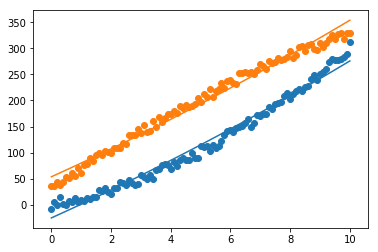

In [213]:
f1(x2)

array([ -25.32810669,  -22.73093887,  -20.125415  ,  -17.51153509,
        -14.88929913,  -12.25870712,   -9.61975907,   -6.97245497,
         -4.31679483,   -1.65277864,    1.0195936 ,    3.70032189,
          6.38940622,    9.08684659,   11.79264302,   14.50679548,
         17.229304  ,   19.96016856,   22.69938917,   25.44696583,
         28.20289853,   30.96718728,   33.73983207,   36.52083291,
         39.3101898 ,   42.10790273,   44.91397171,   47.72839673,
         50.55117781,   53.38231493,   56.22180809,   59.0696573 ,
         61.92586256,   64.79042386,   67.66334121,   70.54461461,
         73.43424405,   76.33222954,   79.23857108,   82.15326866,
         85.07632229,   88.00773196,   90.94749769,   93.89561945,
         96.85209727,   99.81693113,  102.79012103,  105.77166699,
        108.76156899,  111.75982703,  114.76644113,  117.78141126,
        120.80473745,  123.83641968,  126.87645796,  129.92485228,
        132.98160265,  136.04670907,  139.12017153,  142.20199